# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [122]:
# Ajoutez ici les imports de librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

In [18]:
total = pd.DataFrame(titanic)
total.size

10692

2. Combien d'attributs compte le jeu de données ?

In [26]:
titanic.shape[1]

12

3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

In [23]:
titanic
print('Données discrete: Survived, Pclass, Sex, SibSp, Parch, Embarked')
print('Données continue : Age, Fare')
print('Difficile à classer : Name, Ticket, Cabin')

Données discrete: Survived, Pclass, Sex, SibSp, Parch, Embarked
Données continue : Age, Fare
Difficile à classer : Name, Ticket, Cabin


4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

In [24]:
titanic
print('Données qualitative: Name, Ticket, Cabin, Sexe, Embarked')
print('Données quantitative : Survived, Pclass, Age, SibSp, Parch, Fare')

Données qualitative: Name, Ticket, Cabin, Sexe, Embarked
Données quantitative : Survived, Pclass, Age, SibSp, Parch, Fare


5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

In [27]:
quantitative_data = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

quantitative_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

Text(0.5, 1.0, 'Prix du ticket')

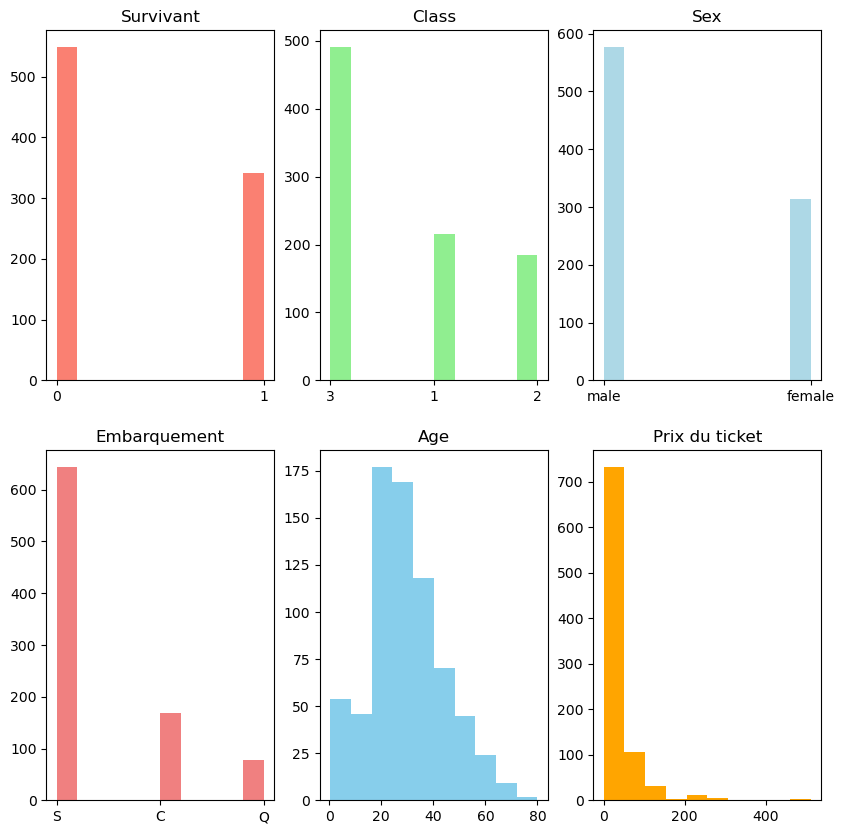

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

axes[0, 0].hist(titanic['Survived'].dropna().astype(str), color='salmon')
axes[0,0].set_title('Survivant')

axes[0, 1].hist(titanic['Pclass'].dropna().astype(str), color='lightgreen')
axes[0,1].set_title('Class')

axes[0, 2].hist(titanic['Sex'].dropna().astype(str), color='lightblue')
axes[0,2].set_title('Sex')

axes[1, 0].hist(titanic['Embarked'].dropna().astype(str), color='lightcoral')
axes[1,0].set_title('Embarquement')

axes[1, 1].hist(titanic['Age'].dropna(), color='skyblue')
axes[1,1].set_title('Age')

axes[1, 2].hist(titanic['Fare'].dropna(), color='orange')
axes[1,2].set_title('Prix du ticket')

7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

   Survived  Count     Sex
0         0     81  female
1         1    233  female
0         0    468    male
1         1    109    male


"sns.catplot(data=titanic, x='Sex', hue='Survived', kind='count')"

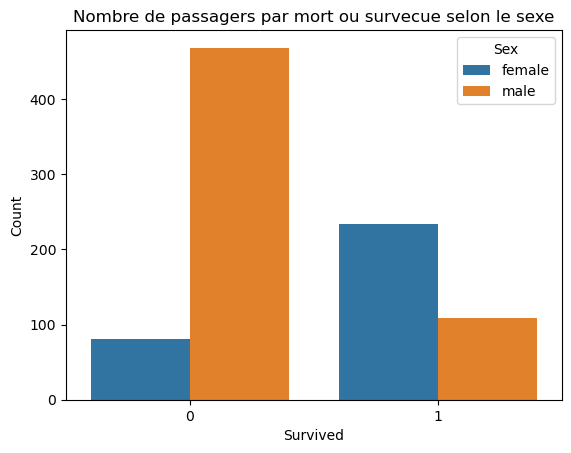

In [41]:
female_group_by_class = titanic[titanic['Sex'] == 'female'].groupby('Survived').size()
male_group_by_class = titanic[titanic['Sex'] == 'male'].groupby('Survived').size()

sexe=['Survecue', 'Mort']

df_female = female_group_by_class.reset_index(name='Count')
df_female['Sex'] = 'female'
df_male = male_group_by_class.reset_index(name='Count')
df_male['Sex'] = 'male'

df = pd.concat([df_female, df_male])
print(df)
ax = sns.barplot(x='Survived', y='Count', hue='Sex', data=df)
plt.title('Nombre de passagers par mort ou survecue selon le sexe')

"""sns.catplot(data=titanic, x='Sex', hue='Survived', kind='count')"""

8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

<Axes: >

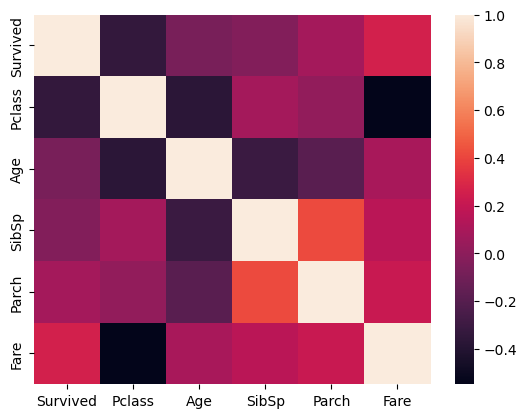

In [44]:
sns.heatmap(quantitative_data.corr())

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

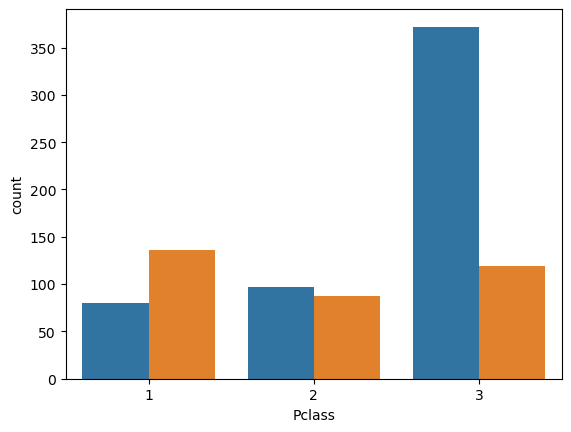

In [45]:
sns.countplot(data=titanic, x='Pclass', hue='Survived')

C:\Users\bvannier2021\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

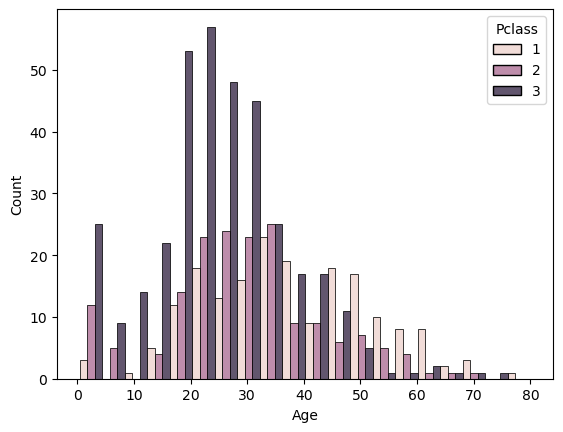

In [46]:
sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='dodge')

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

In [61]:
total = pd.DataFrame(titanic)
total.isnull().sum().sum()

866

### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

In [91]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

In [96]:
titanic['Embarked'].fillna('U', inplace=True)
titanic[titanic['Embarked'] == 'U']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,U
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,U


### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

In [102]:
"""titanic.drop(columns=['Cabin'], inplace=True)"""
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

In [110]:
moyenne_par_class = titanic.groupby(['Pclass', 'Sex'])['Age'].mean()

print(moyenne_par_class)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

In [128]:
"""for ligne in titanic[ligne]
    if titanic['Age'].isna():
         if titanic['Pclass'] == 1:
             if titanic['Sex'] == 'female':
                 titanic['Age'].fillna('34.00', inplace=True)
            else:
                titanic['Age'].fillna('41.00', inplace=True)
        elif titanic['Pclass'] == 2:
            if titanic['Sex'] == 'female':
                 titanic['Age'].fillna('28.00', inplace=True)
            else:
                titanic['Age'].fillna('30.00', inplace=True)
        else:
            if titanic['Sex'] == 'female':
                 titanic['Age'].fillna('21.00', inplace=True)
            else:
                titanic['Age'].fillna('26.00', inplace=True)"""
"""
def impute_age(row):
    if pd.isna(row['Age']):
        if row['Pclass'] == 1:
            return 34.00 if row['Sex'] == 'female' else 41.00
        elif row['Pclass'] == 2:
            return 28.00 if row['Sex'] == 'female' else 30.00
        else:
            return 21.00 if row['Sex'] == 'female' else 26.00
    else:
        return row['Age']"""

"""titanic['Age'] = titanic.apply(impute_age, axis=1)"""
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,21.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

In [113]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

In [114]:
titanic.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

In [124]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(columns=['SibSp', 'Parch'], inplace=True)
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,21.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

***Colonne ou le hot-ones est pertinent***
- La colonne Embarked car on a comme donées des U,S,C,Q qui pourrais être remplacé par 0,1,2,3
- La colonne Sex cae nous avons des string que l'on pourrais remplacé par un 0 ou 1 

In [146]:
"""encoder = OneHotEncoder(drop='if_binary')

on_hot = encoder.fit_transform(titanic[['Sex', 'Embarked']]).toarray()
on_hot_label = encoder.get_feature_names_out(['Sex', 'Embarked'])
on_hot_label

dataframe = pd.DataFrame(data=on_hot, columns=on_hot_label)

titanic = titanic.join(dataframe)"""

"""titanic = titanic.drop(columns=['Sex', 'Embarked'], axis=1)"""

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Family      891 non-null    int64  
 5   Sex_male    891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Embarked_U  891 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

In [147]:
titanic.to_csv('Titanic.csv', index=False)

# Fin du TP !